In [1]:
options(jupyter.rich_display=FALSE) # Create output as usual in R

In [2]:
library(sf)

Linking to GEOS 3.7.1, GDAL 2.4.0, PROJ 5.2.0



In [3]:
library(cshapes)

Loading required package: sp

Loading required package: maptools

Checking rgeos availability: TRUE

Loading required package: plyr



In [4]:
cshapes.1990 <- cshp(as.Date("1990-01-01"))
cshapes.1990 <- as(cshapes.1990,"sf")

Warning message:
“readShapePoly is deprecated; use rgdal::readOGR or sf::st_read”


In [5]:
options(width=200)
print(cshapes.1990[1:10])

Simple feature collection with 171 features and 10 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -180 ymin: -55.90223 xmax: 180 ymax: 83.11387
CRS:            +proj=longlat +ellps=WGS84
First 10 features:
           CNTRY_NAME         AREA       CAPNAME CAPLONG     CAPLAT FEATUREID COWCODE COWSYEAR COWSMONTH COWSDAY                       geometry
0              Guyana  211982.0050    Georgetown   -58.2   6.800000         0     110     1966         5      26 MULTIPOLYGON (((-58.17262 6...
1            Suriname  145952.2740    Paramaribo   -55.2   5.833333         1     115     1975        11      25 MULTIPOLYGON (((-55.12796 5...
2 Trinidad and Tobago    5041.7290 Port-of-Spain   -61.5  10.650000         2      52     1962         8      31 MULTIPOLYGON (((-61.07945 1...
3           Venezuela  916782.2172       Caracas   -66.9  10.500000         3     101     1946         1       1 MULTIPOLYGON (((-66.31029 1...
4               Samoa    2955.2124          

In [6]:
SthAmCntry.names <- c(
    "Argentina",
    "Bolivia",
    "Brazil",
    "Chile",
    "Colombia",
    "Ecuador",
    "Guyana",
    "Paraguay",
    "Peru",
    "Suriname",
    "Uruguay",
    "Venezuela")

In [7]:
SthAmCountries <-
    subset(cshapes.1990,
           CNTRY_NAME %in% SthAmCntry.names)

In [8]:
Brazil <- subset(cshapes.1990,CNTRY_NAME=="Brazil")
Chile <-  subset(cshapes.1990,CNTRY_NAME=="Chile")
Colombia <-  subset(cshapes.1990,CNTRY_NAME=="Colombia")

In [9]:
cap.latlong <- with(cshapes.1990,cbind(CAPLONG,CAPLAT))

In [10]:
cap.latlong <- lapply(1:nrow(cap.latlong),
                      function(i)cap.latlong[i,])

In [11]:
cap.latlong <- lapply(cap.latlong,st_point)
cap.latlong <- st_sfc(cap.latlong)

In [12]:
cshapes.capitals.1990 <- cshapes.1990
st_geometry(cshapes.capitals.1990) <- cap.latlong

In [13]:
st_crs(cshapes.capitals.1990) <- st_crs(cshapes.1990)

In [14]:
print(cshapes.capitals.1990[1:10])

Simple feature collection with 171 features and 10 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: -175 ymin: -41.3 xmax: 179 ymax: 64.15
CRS:            +proj=longlat +ellps=WGS84
First 10 features:
           CNTRY_NAME         AREA       CAPNAME CAPLONG     CAPLAT FEATUREID COWCODE COWSYEAR COWSMONTH COWSDAY               geometry
0              Guyana  211982.0050    Georgetown   -58.2   6.800000         0     110     1966         5      26      POINT (-58.2 6.8)
1            Suriname  145952.2740    Paramaribo   -55.2   5.833333         1     115     1975        11      25 POINT (-55.2 5.833333)
2 Trinidad and Tobago    5041.7290 Port-of-Spain   -61.5  10.650000         2      52     1962         8      31    POINT (-61.5 10.65)
3           Venezuela  916782.2172       Caracas   -66.9  10.500000         3     101     1946         1       1     POINT (-66.9 10.5)
4               Samoa    2955.2124          Apia  -172.0 -13.800000         4     990     1976    

In [15]:
Brasilia <- subset(cshapes.capitals.1990,CNTRY_NAME=="Brazil")
Santiago <-  subset(cshapes.capitals.1990,CNTRY_NAME=="Chile")
Bogota <-  subset(cshapes.capitals.1990,CNTRY_NAME=="Colombia")

Warning message:
“plotting the first 9 out of 24 attributes; use max.plot = 24 to plot all”


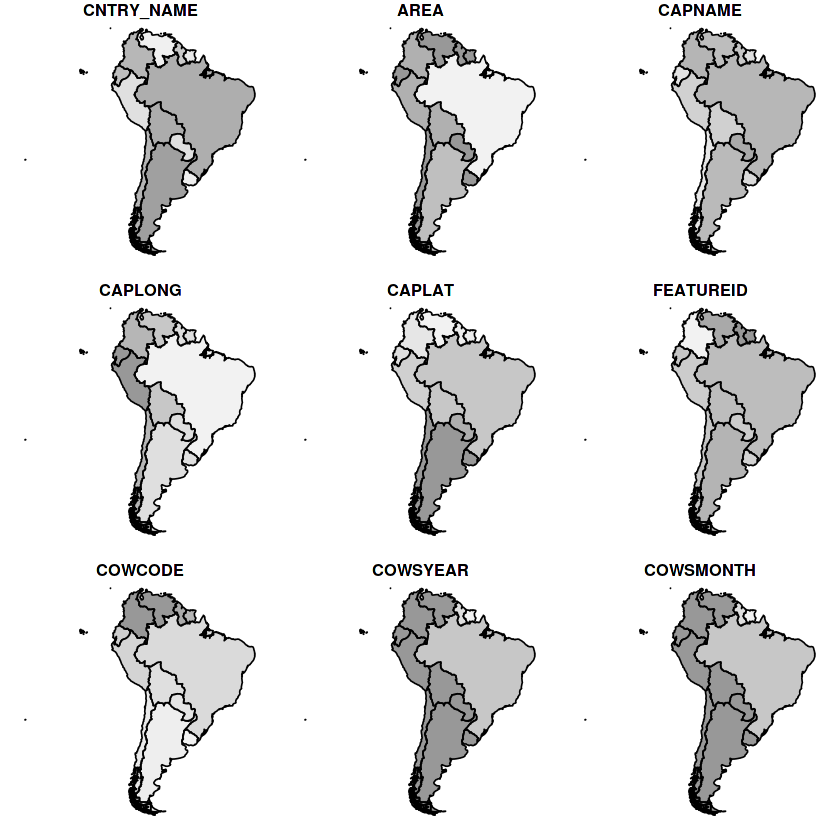

In [16]:
graypal <- function(n)gray.colors(n,start=.2,end=.9,alpha=.5)
plot(SthAmCountries,pal=graypal)

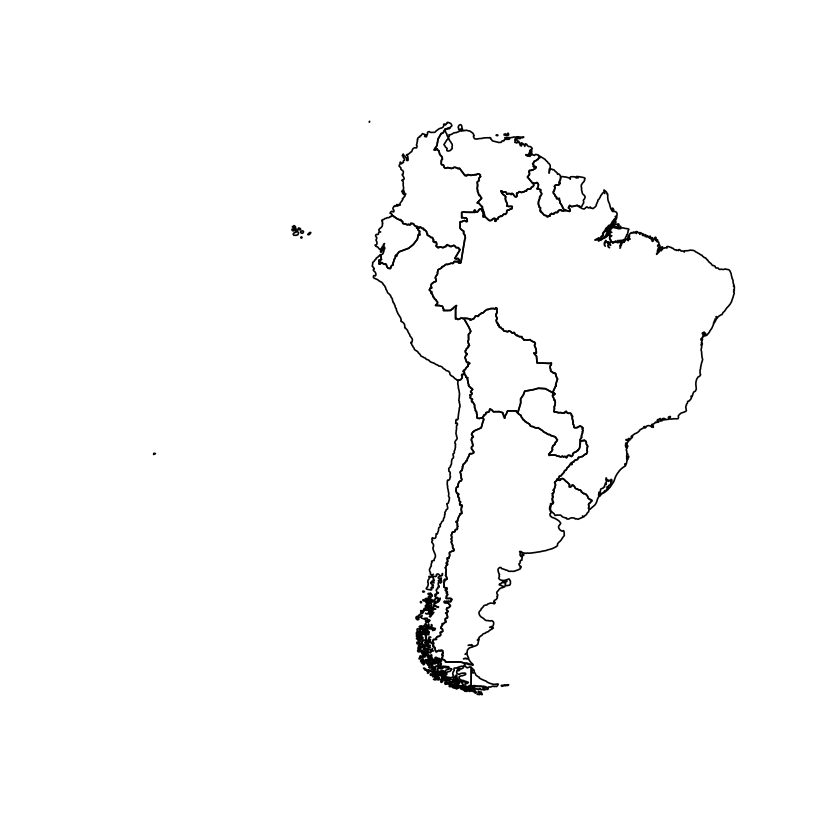

In [17]:
plot(st_geometry(SthAmCountries))

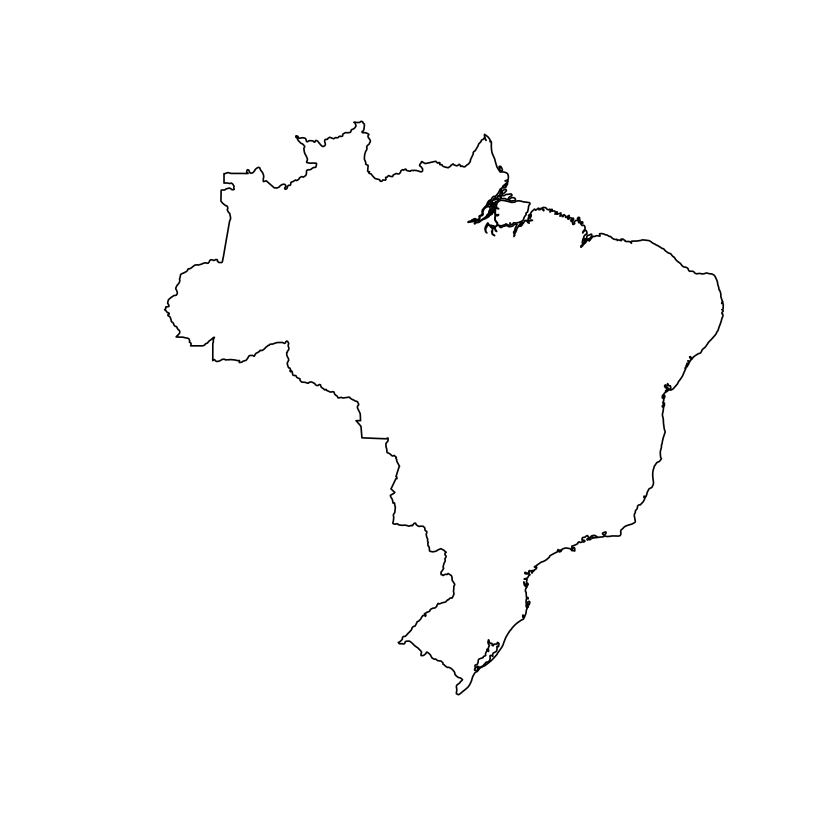

In [18]:
plot(st_geometry(Brazil))

In [19]:
save(cshapes.1990,cshapes.capitals.1990,file="cshapes-1990.RData")
save(Brazil,Chile,Colombia,
     Brasilia,Santiago,Bogota,
     SthAmCountries,
     file="south-america-1990.RData")